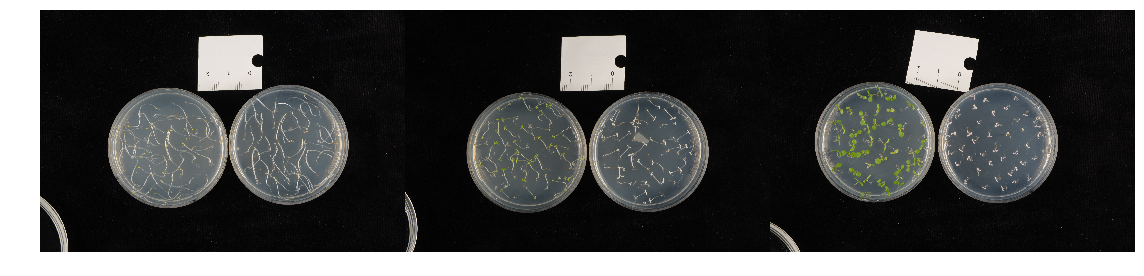

In [1]:
%matplotlib inline
import cv2, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from helper import plot_mats

A = cv2.cvtColor(cv2.imread('img/Dark.JPG'), cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('img/PAR 2.43.JPG'), cv2.COLOR_BGR2RGB)
C = cv2.cvtColor(cv2.imread('img/PAR_58.16.JPG'), cv2.COLOR_BGR2RGB)

plot_mats([A,B,C], cols=3)

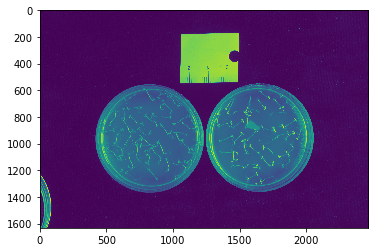

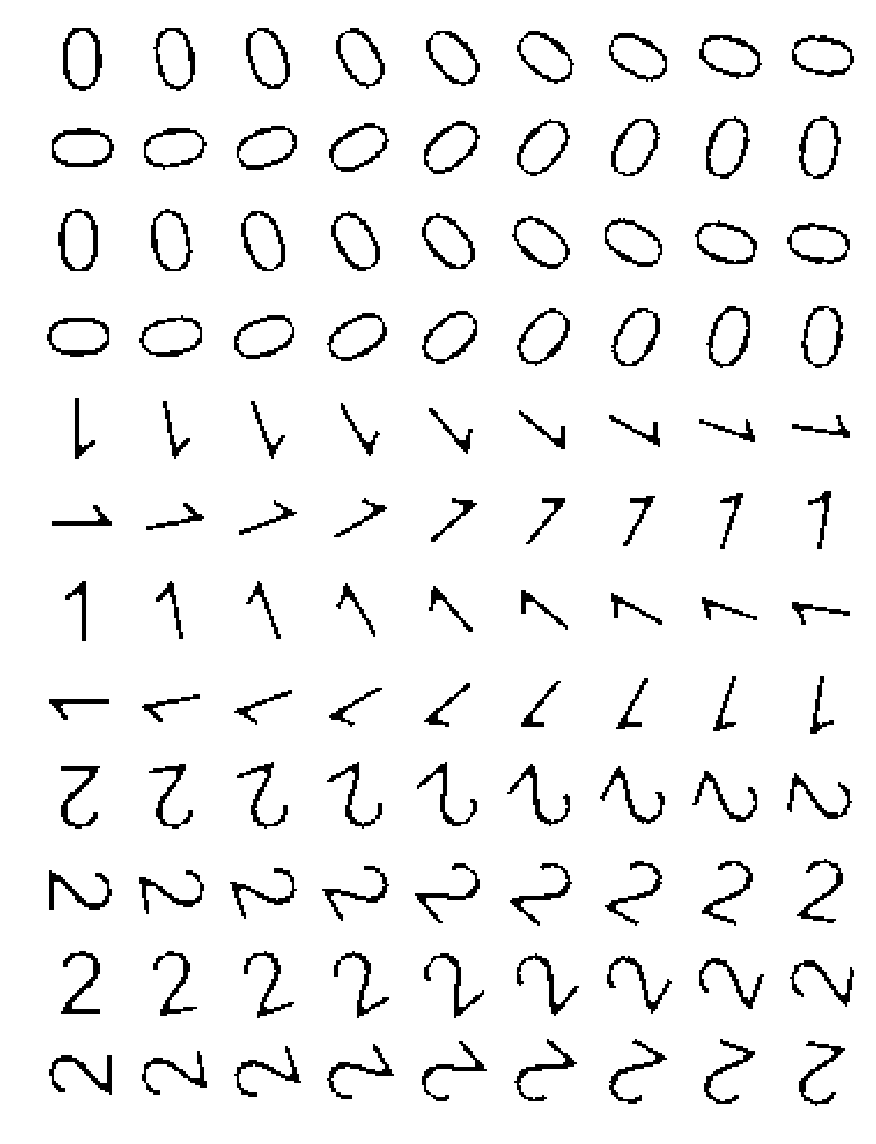

In [84]:
img = cv2.cvtColor(B, cv2.COLOR_RGB2GRAY)

h, w = img.shape
img = cv2.resize(img, (int(w * 0.5), int(h * 0.5)))

plt.imshow(img)

img = cv2.bilateralFilter(img, 10, 1, 1000)
img = cv2.equalizeHist(img)

zero_p = (int(855/2), int(2801/2))
one_p = (int(860/2), int(2514/2))
two_p = (int(868/2), int(2235/2))
w = 100

zero = img[zero_p[0] - w:zero_p[0] + w,
           zero_p[1] - w:zero_p[1] + w].copy()
one = img[one_p[0] - w:one_p[0] + w,
           one_p[1] - w:one_p[1] + w].copy()
two = img[two_p[0] - w:two_p[0] + w,
           two_p[1] - w:two_p[1] + w].copy()

#two = cv2.line(two, (50, 0), (50, 100), (0))
#two = cv2.line(two, (0, 50), (100, 50), (0))

def cut(img):
    #return img
    return (img > 200) * 126

zeros, ones, twos = [], [], []
for a in range(0, 360, 10):
    ax, bx, ay, by = 80, 120, 80, 120
    R = cv2.getRotationMatrix2D((100, 100),a,1)
    dst = cut(cv2.warpAffine(zero,R,(200,200))).astype('uint8')
    zeros.append(dst[ax:bx,ay:by])
    
    dst = cut(cv2.warpAffine(one,R,(200,200))).astype('uint8')
    ones.append(dst[ax:bx,ay:by])
    
    dst = cut(cv2.warpAffine(two,R,(200,200))).astype('uint8')
    twos.append(dst[ax:bx,ay:by])

plot_mats(zeros + ones + twos, cols=9)

temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 
temp 


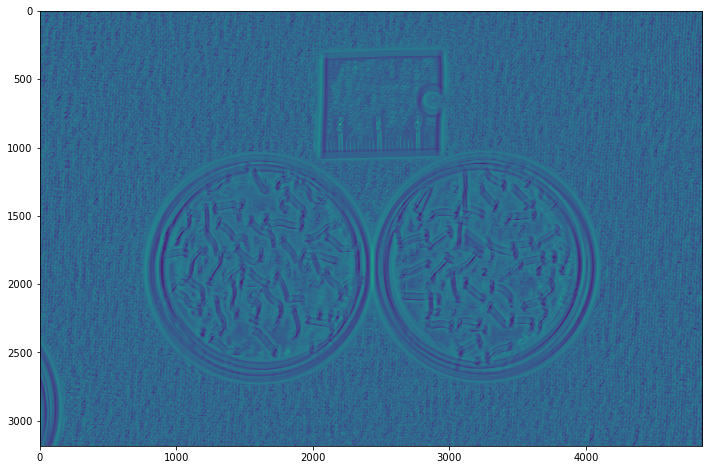

In [71]:
#help(cv2)
def match_templates(img, templates):
    img = cv2.bilateralFilter(img, 10, 1, 1000)
    img = cv2.equalizeHist(img)
    for T in templates:
        minv, maxv, minloc, maxloc =cv2.minMaxLoc(
            cv2.matchTemplate(img.astype('uint8'), T, cv2.TM_CCOEFF_NORMED)
        )

img = cv2.cvtColor(B, cv2.COLOR_RGB2GRAY)

match_templates(img, zeros)

T = twos[0].astype('uint8')
img = cv2.matchTemplate(img.astype('uint8'), T, cv2.TM_CCOEFF_NORMED)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(img)